In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [3]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

［0,1］の一様乱数に対する非線形な多項式関数の値にランダムなノイズを乗せた2次元データをプロット

No handles with labels found to put in legend.


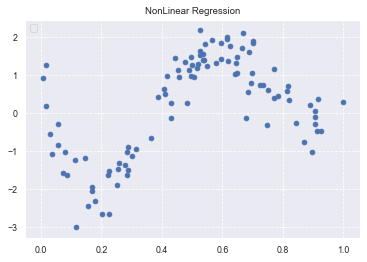

In [4]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)     # [0, 1]の一様乱数をn個生成
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

### ★ 発生させた周期的に変動する2次元データに対して、sklearnのLinearRegressionで線形回帰して
### 　 回帰直線をプロット

0.2512476548185014


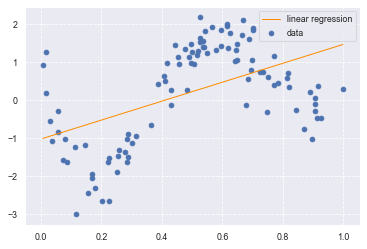

In [5]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

### ★ 発生させた周期的に変動する2次元データに対して、Kernel Ridge Regression は非線形な
### 　 ガウス型基底関数rbfにより、l2制約付き最小二乗法で学習させて回帰分析し、非線形回帰曲線をプロット

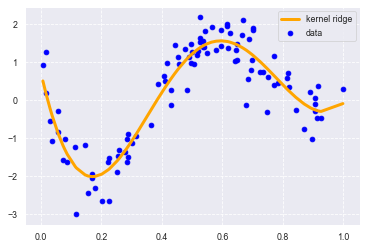

In [6]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

### ★ KernelRidgeを使わずに、RBFカーネルによるl2制約付き最小二乗方法で学習させて回帰分析し、
### 　 非線形回帰曲線と基底関数をプロット
　   　　⇒　決定係数は0.844で、線形モデルから大幅に改善

0.8442145484419565


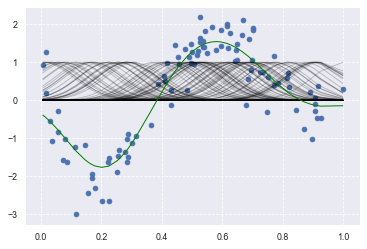

In [7]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

### ★ LinearRegressionで線形回帰と、2次から10次までの多項式による非線形回帰曲線で学習させて、
### 　 予測値をプロット
　   　　⇒　3次多項式曲線が最も低バイアスで低バリアンスに見える

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

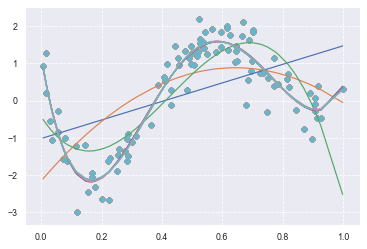

In [9]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

### ★ RBFカーネルによるl1制約付き最小二乗方法で学習させて回帰分析し、回帰曲線をプロット
　   　　⇒　決定係数は-4.44と悪い

-4.440892098500626e-16


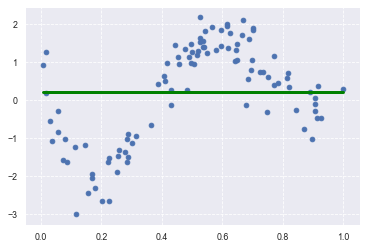

In [10]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

### ★ サポートベクター回帰（SVR）のガウシアンカーネルで回帰分析し、予測曲線をプロット
'''
    次のURLでSVRについて参照　
    https://qiita.com/koshian2/items/baa51826147c3d538652
'''

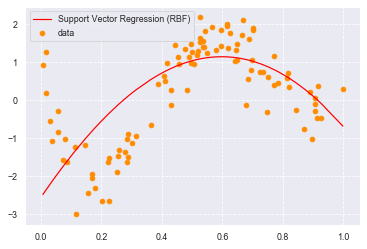

In [11]:
# from sklearn import cross_validation, preprocessing, linear_model, svm
from sklearn import preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

### ★ 深層学習（全結合の10層、活性化関数ReLu）で予測し、ノイズ付与前の元のデータの
### 　 真の関数値と比較してプロット
　   　　⇒　予測精度が高いように見える

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

# モデルの出力先パスを指定
import os
model_dir = './out/checkpoints/'
if os.path.exists(model_dir) == False:os.mkdir(model_dir)
cb_cp = ModelCheckpoint('./out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
model_dir = './out/tensorBoard/'
if os.path.exists(model_dir) == False:os.mkdir(model_dir)
cb_tf  = TensorBoard(log_dir='./out/tensorBoard/', histogram_freq=0)

# relu_reg_model を定義 (下記関数を追加)
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

790 - val_loss: 0.6711
Epoch 16/100
85/90 [===========================>..] - ETA: 0s - loss: 0.5525
Epoch 00016: saving model to ./out/checkpoints/weights.16-0.43.hdf5
90/90 [==============================] - 3s 29ms/sample - loss: 0.5524 - val_loss: 0.4318
Epoch 17/100
85/90 [===========================>..] - ETA: 0s - loss: 0.6747
Epoch 00017: saving model to ./out/checkpoints/weights.17-0.71.hdf5
90/90 [==============================] - 2s 26ms/sample - loss: 0.6930 - val_loss: 0.7084
Epoch 18/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4948
Epoch 00018: saving model to ./out/checkpoints/weights.18-0.52.hdf5
90/90 [==============================] - 2s 28ms/sample - loss: 0.4865 - val_loss: 0.5208
Epoch 19/100
85/90 [===========================>..] - ETA: 0s - loss: 0.4658
Epoch 00019: saving model to ./out/checkpoints/weights.19-0.43.hdf5
90/90 [==============================] - 3s 36ms/sample - loss: 0.4572 - val_loss: 0.4319
Epoch 20/100
85/90 [=================

In [15]:
y_pred = estimator.predict(x_train)

90/90 [==============================] - 0s 4ms/sample


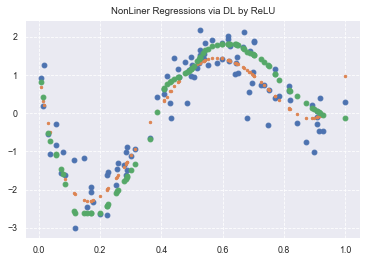

In [16]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [17]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
